# Caçador de OVNIs

Em que estado e horário é mais "fácil" de avistar um OVNI nos EUA?

### Importando o que importa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

### Lendo o arquivo com todas as ocorrências

In [2]:
df = pd.read_json('https://raw.githubusercontent.com/joaoariedi/presentations/master/Ovnis%20Hunter/ovnis_hunter/ovins.json')

In [ ]:
type(df)

### Visualizando uma amostra dos dados

In [ ]:
df.head()

### Renomeando as colunas

In [3]:
df.columns = ['link', 'data', 'cidade', 'estado', 'pais', 'forma', 'duracao', 'relato', 'postado', 'imagens']
df.head()

,link,data,cidade,estado,pais,forma,duracao,relato,postado,imagens
0,https://www.nuforc.org/webreports//reports/175...,2023-05-19 01:49:00,Harrisburg East of I5,OR,USA,Light,Approx. 3-4 min.,9 lights in straight line,5/19/23,None
1,https://www.nuforc.org/webreports//reports/175...,2023-05-18 19:40:00,Kippens,NF,Canada,Circle,5 minutes,Looked out window and saw the sun catching on ...,5/19/23,Yes
2,https://www.nuforc.org/webreports//reports/175...,2023-05-18 13:27:00,Hurricane,UT,USA,Cigar,10 minutes,Saw what looked like a long cigar shaped objec...,5/19/23,None
3,https://www.nuforc.org/webreports//reports/175...,2023-05-17 23:20:00,Sharpsville,IN,USA,Oval,1 hour,Oval like object over town no brightness,5/19/23,None
4,https://www.nuforc.org/webreports//reports/175...,2023-05-17 23:00:00,Tadepalligudem,Andhra Pradesh,India,Cube,5 minutes,We are watching the night sky suddenly there i...,5/19/23,Yes


In [ ]:
df.tail()

In [ ]:
df_drop = df.dropna(subset = ['postado'])

df_drop


In [ ]:
def count_post(dado):
    try:
        return len(dado)
    except TypeError:
        return 0
    except Exception:
        



In [ ]:
df_drop.postado.apply(lambda x: len(x))

### Convertendo uma coluna com datas de <code>string</code> para <code>datetime</code>

In [ ]:
df['data'] = pd.to_datetime(df['data'])

In [ ]:
df.head()

### Limpando os relatos com dados faltantes

In [ ]:
filter1 = df.postado != None
df[filter1]

In [ ]:
selector = pd.isnull(df['forma'])
df[selector].head()

In [4]:
df_dropped = df.dropna(subset = ['forma'])

In [ ]:
df_dropped.shape

### Agrupando os resultados por estado

In [5]:
ocorrencias_por_estado = df_dropped.groupby('estado')['data'].count()

In [16]:
ocorrencias_por_estado.sort_values(ascending=False, inplace=True)

AttributeError: 'NoneType' object has no attribute 'describe'

### Plotando os 10 estados com mais ocorrências

In [17]:
ocorrencias_por_estado.describe()

count      351.000000
mean       364.347578
std       1264.433280
min          1.000000
25%          1.000000
50%          1.000000
75%          5.000000
max      15127.000000
Name: data, dtype: float64

<Axes: xlabel='estado'>

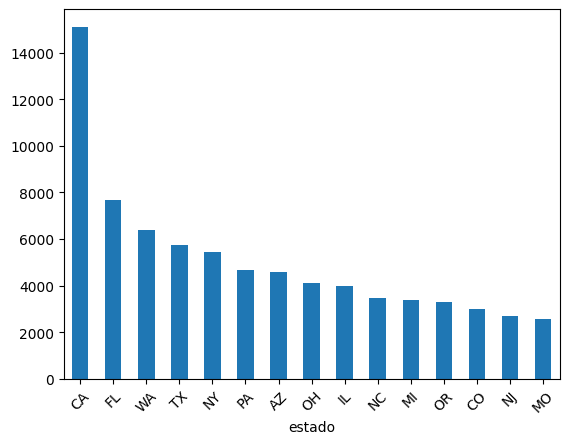

In [25]:
ocorrencias_por_estado.head(15).plot.bar(rot=45)

### Extraindo um <code>subset</code> com somente com os dados da Califórnia

In [26]:
selector = df_dropped['estado'] == "CA"

In [27]:
california = df_dropped[selector]

In [30]:
california.head()

,link,data,cidade,estado,pais,forma,duracao,relato,postado,imagens
6,https://www.nuforc.org/webreports//reports/175...,2023-05-17 15:30:00,Santa Barbara,CA,USA,Other,2 min 23 sec,"1 Rotation ~ 1 sec, Wobbling. Square but thinn...",5/19/23,Yes
9,https://www.nuforc.org/webreports//reports/175...,2023-05-16 22:45:00,Claremont,CA,USA,Light,15 minutes,Hovering and darting blinking lights at about ...,5/19/23,None
21,https://www.nuforc.org/webreports//reports/175...,2023-05-14 22:20:00,College city,CA,USA,Formation,Can’t explain w 25 charac,Clear night. About 10:20 pm..walking/we turn a...,5/19/23,None
77,https://www.nuforc.org/webreports//reports/175...,2023-05-08 19:49:00,West hills,CA,USA,Changing,5 minutes,"3 black objects in a vertical line, spinning a...",5/19/23,Yes
87,https://www.nuforc.org/webreports//reports/175...,2023-05-07 01:00:00,La Mirada,CA,USA,Fireball,3 minutes,Fireball descends and flickers away into night...,5/19/23,None


### Extraindo a hora de cada ocorrência e adicionando em uma nova coluna

In [31]:
california['hora'] = california['data'].dt.hour

### Plotando um <code>histograma</code> para examinar a distribuição de ocorrências

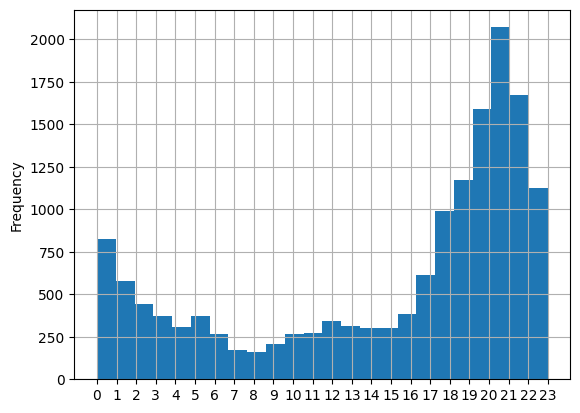

In [34]:
hora_hist = california['hora'].plot.hist(bins=24, grid=True)
plt.xticks(range(california['hora'].min(), california['hora'].max()+1, 1))
plt.show()

# Desafio

### Quais os 5 formatos de OVNI mais comuns nos relatos?

In [ ]:
# CODE

### Qual o horário mais difícil para avistarmos um OVNI em forma de Charuto?

In [ ]:
# CODE

# Wordcloud


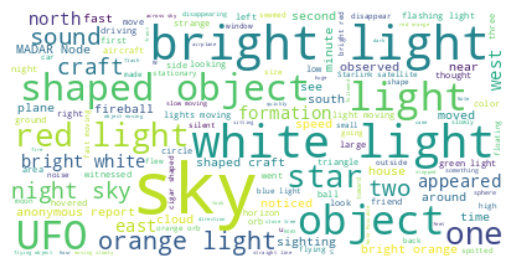

In [39]:
from wordcloud import WordCloud, STOPWORDS

# dropping nill
relatos = df.relato.dropna()

# combining summary
text = " ".join(review for review in relatos)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["saw", "looked", "nuforc", "seen", "disappeared", "hovering"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
df.query("forma != None & imagens != None ")

,link,data,cidade,estado,pais,forma,duracao,relato,postado,imagens
0,https://www.nuforc.org/webreports//reports/175...,2023-05-19 01:49:00,Harrisburg East of I5,OR,USA,Light,Approx. 3-4 min.,9 lights in straight line,5/19/23,None
1,https://www.nuforc.org/webreports//reports/175...,2023-05-18 19:40:00,Kippens,NF,Canada,Circle,5 minutes,Looked out window and saw the sun catching on ...,5/19/23,Yes
2,https://www.nuforc.org/webreports//reports/175...,2023-05-18 13:27:00,Hurricane,UT,USA,Cigar,10 minutes,Saw what looked like a long cigar shaped objec...,5/19/23,None
3,https://www.nuforc.org/webreports//reports/175...,2023-05-17 23:20:00,Sharpsville,IN,USA,Oval,1 hour,Oval like object over town no brightness,5/19/23,None
4,https://www.nuforc.org/webreports//reports/175...,2023-05-17 23:00:00,Tadepalligudem,Andhra Pradesh,India,Cube,5 minutes,We are watching the night sky suddenly there i...,5/19/23,Yes
...,...,...,...,...,...,...,...,...,...,...
143280,https://www.nuforc.org/webreports//reports/154...,2020-04-01 10:00:00,Johnscreek,GA,USA,Circle,10,"Glowing circular disc was spinning clock wise,...",5/15/20,None
143281,https://www.nuforc.org/webreports//reports/154...,2020-04-01 09:45:00,Woodbury,MN,USA,Sphere,1 minutes,I was looking out my window and saw a bright w...,6/25/20,None
143282,https://www.nuforc.org/webreports//reports/155...,2020-04-01 09:28:00,Nairobi (Kenya),None,Kenya,Sphere,15-20 minutes,Shining sphere,6/25/20,None
143283,https://www.nuforc.org/webreports//reports/154...,2020-04-01 04:00:00,Anderson,SC,USA,Light,30+ minutes,2 lights appeared out of nowhere just down and...,6/25/20,None
